Kmeans jest algorytmem 'centroidów'

In [1]:

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
scaler = MinMaxScaler()
scaled_sepal_l = scaler.fit_transform(df[['sepal length (cm)']])
scaled_sepal_w = scaler.fit_transform(df[['sepal width (cm)']])
scaled_petal_l = scaler.fit_transform(df[['petal length (cm)']])
scaled_petal_w = scaler.fit_transform(df[['petal width (cm)']])
df_scaled = df.copy()
df['sepal length (cm)'] = scaled_sepal_l
df['sepal width (cm)'] =  scaled_sepal_w
df['petal length (cm)'] = scaled_petal_l
df['petal width (cm)'] = scaled_petal_w


In [5]:
sse = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(k)
    model.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    sse.append(model.inertia_)

e:\ML & Data\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\ML & Data\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(1.0, 21.0)

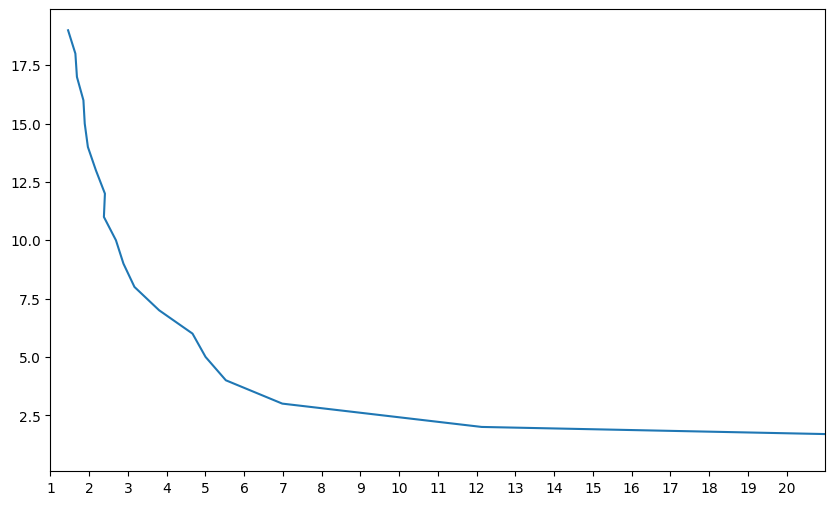

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(sse,k_range)
plt.xticks(np.arange(1, 21, step=1))
plt.xlim(1, 21)

In [7]:
final = KMeans(n_clusters=7)
result = final.fit_predict(df)
result


array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 0, 1, 1, 1, 5, 1, 3, 1, 5, 1, 5, 5, 3, 5, 3, 3, 1,
       3, 3, 3, 5, 6, 3, 6, 3, 1, 1, 1, 1, 3, 5, 5, 5, 3, 6, 3, 1, 1, 3,
       3, 5, 3, 3, 3, 5, 3, 3, 3, 3, 5, 3, 2, 6, 2, 6, 2, 2, 5, 2, 6, 2,
       2, 6, 2, 6, 6, 2, 6, 2, 2, 6, 2, 6, 2, 6, 2, 2, 6, 6, 6, 1, 2, 2,
       6, 6, 6, 2, 2, 6, 6, 2, 2, 2, 6, 2, 2, 2, 6, 6, 2, 6])